# CycleGAN Abstract Forests

This is the code corresponding to my Duke AI for Art Competition submission. This notebook was ran on a 15" Windows Surface Book 2 with a NVIDIA GeForce GTX 1060 GPU.<br>

Here, I used a CycleGAN to generate abstract pictures of forests. For the CycleGAN, I used the PyTorch implementation from the creators of the CycleGAN. Their library can be found [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)

## Importing functions

In [3]:
import sys

sys.path.append("C:\\Users\\adminUser\\Documents\\VEGAN\\fastai-master\\old")
sys.path.append("C:\\Users\\adminUser\\Documents\\VEGAN\\cgan")
sys.path.append("C:\\Users\\adminUser\\Documents\\VEGAN\\cgan\\data")

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.conv_learner import *
from fastai.dataset import *
from cgan.options.train_options import *
from sklearn.model_selection import train_test_split
from cgan.options.train_options import TrainOptions
from cgan.data.data_loader import CreateDataLoader
from cgan.models.models import create_model
from cgan.util.visualizer import Visualizer
from google_images_download import google_images_download


C:\Users\adminUser\Anaconda3\envs\fastai\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Selecting images for training

For training, I used images of "famous abstract paintings" and "forests" These images were scraped from Google Images. After scraping 400 images, I went through and chose 216 images from each category. These were the images included in training.<br>

First downloading "famous abstract art pictures"

In [ ]:
#class instantiation
response = google_images_download.googleimagesdownload()   

#creating list of arguments
arguments = {"keywords":"famous abstract art",
             "limit":400,
             "output_directory":"C:\\Users\\adminUser\\Documents\\VEGAN\\input_data",
             "chromedriver":"C:\\Users\\adminUser\\Documents\\VEGAN\\chromedriver.exe"}   

#passing the arguments to the function
paths = response.download(arguments)   

Now downloading "forest" images

In [ ]:
#class instantiation
response = google_images_download.googleimagesdownload()   

#creating list of arguments
arguments = {"keywords":"forest",
             "limit":400,
             "output_directory":"C:\\Users\\adminUser\\Documents\\VEGAN\\input_data",
             "chromedriver":"C:\\Users\\adminUser\\Documents\\VEGAN\\chromedriver.exe"}

#passing the arguments to the function
paths = response.download(arguments)   

In [14]:
response = google_images_download.googleimagesdownload()   

#creating list of arguments
arguments = {"keywords":"abstract",
             "limit":40,
             "output_directory":"C:\\Users\\adminUser\\Documents\\VEGAN\\input_data",
             "chromedriver":"C:\\Users\\adminUser\\Documents\\VEGAN\\chromedriver.exe"}

#passing the arguments to the function
paths = response.download(arguments) 


Item no.: 1 --> Item name = abstract
Evaluating...
Starting Download...
Completed Image ====> 1.611Cd1g%2BpeL._SX322_BO1,204,203,200_.jpg
Completed Image ====> 2.Flow_ollnzm.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 3.7710349-multicolored-abstract-rainbow-background.jpg
Completed Image ====> 4.abstract-particles-background-with-light-effect_1017-20135.jpg
Completed Image ====> 5.abstract-neon-background-bright-shining-vector-22744310.jpg
Completed Image ====> 6.abstract-painting.jpg
Completed Image ====> 7.abstract-7680x4320-colorful-8k-20675.jpg
Completed Image ====> 8.1051_pia21983.jpg
Completed Image ====> 9.abstract-slider-1.jpg
Completed Image ====> 10.content_geordanna-cordero-fields-762612-unsplash.jpg
Completed Image ====> 11.expressions-abstract-sky-53-velux-ob-3.jpg
Completed Image ====> 12.tenor.gif
Completed Image ====> 13.abstract-low-poly-design_1048-8606.jpg
Completed Image ====> 14.RHC-Z-071919rhalps_Mobile-Abstract-Example1.jpg
Completed I

Visualizing a couple example images

In [6]:
forest_PATH = Path('input_data/trainA/')
painting_PATH = Path('input_data/trainB/')

## Constructing the model

Now constructing the CycleGAN Model. Specifying options. If you go to the CycleGAN library linked above, you can see what each of the specifications mean and other options. <br>

Just to note, when I first ran this model, it crashed after 180 epochs (I had my laptop closed for a little while), so I had restart the kernel and start training again at 180 epochs. So if you want to run the model from the beginning, please remove the options ***--continue_train*** and ***--epoch_count, 180***

In [7]:
opt = TrainOptions().parse(['--dataroot', 'input_data/', '--nThreads', '8', '--no_dropout','--niter', '100', 
                            '--niter_decay', '100', '--name', 'nodrop', '--gpu_ids', '0','--update_html_freq', '1','--display_freq','1'])

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: forest_painting/
dataset_mode: unaligned
display_freq: 1
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 256
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 286
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 8
n_layers_D: 3
name: nodrop
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


Now creating the dataset. Just to note it automatically is looking for directories *trainA* and *trainB*. These directories should contain your images. You also have the option of including test images, which should be in directories *testA* and *testB*. Note, I do not have any images here in the test set, since the goal is to create art and not necessarily a model that generalizes.

In [8]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

CustomDatasetDataLoader
dataset [UnalignedDataset] was created


394

Below creating the model and also the visualizer, which allows you to visualize the images during training in visdom. It is allows you to save the example training images in a html page.

In [ ]:
model = create_model(opt)

#visualizer = Visualizer(opt)

## Training  the model

Finally ready to train the model. The code below is pretty much taken from the CycleGAN library, so nothing special there. Just run the cell below and training will start.

In [ ]:
total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        #visualizer.reset()
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0
            #visualizer.display_current_results(model.get_current_visuals(), epoch, save_result)

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()

Saving the model. These weights are available for download [here](https://www.dropbox.com/sh/u0bt5ws99rkm6qv/AACwLG_rQ6XrHv-Z7z3xN3tfa?dl=0)

In [ ]:
model.save(201)

## Visualzing the saving the results

Now finially ready to visualize the results. Below I just show the generated forests pictures because they are of interest. Note, below I did not visualize them all because it made the notebook too large, but all of the images are available in the Github repository.<br>

I am loading the pretrained model so I just set *--epoch_count* to *201*

In [10]:
opt = TrainOptions().parse(['--dataroot', 'data/input_data/', '--nThreads', '8', '--no_dropout',
                           '--niter', '100', '--niter_decay', '100', '--name', 'nodrop', '--gpu_ids', '0',
                           '--update_html_freq', '1','--display_freq','1','--continue_train',
                           '--epoch_count', '201', '--which_epoch', '201'])

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: True
dataroot: data/forest_painting/
dataset_mode: unaligned
display_freq: 1
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 201
fineSize: 256
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 286
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 8
n_layers_D: 3
name: nodrop
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1
which_direction: AtoB
which_epoch: 201
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [12]:
model = create_model(opt)
model.opt.isTrain=False

cycle_gan
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inplace)
        (4): ReflectionPad2d((1, 1, 1, 1))
        (5): Co

In [107]:
# Function to show images
def show_img(im, ax=None, figsize=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [108]:
# Function to generate one image. Funciton called two cells below
def get_one(data):
    model.set_input(data)
    model.test()
    #return list(model.get_current_visuals().values())
    return list(model.get_current_visuals().values())

In [110]:
# Creating list of generated forest images
generated_forest_ims = []
for i,o in enumerate(dataset):
    try:
        vis = get_one(o)
        generated_forest_ims.append(vis)
    except:
        pass

    

OSError: Traceback (most recent call last):
  File "C:\Users\adminUser\Anaconda3\envs\fastai\lib\site-packages\torch\utils\data\dataloader.py", line 55, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\Users\adminUser\Anaconda3\envs\fastai\lib\site-packages\torch\utils\data\dataloader.py", line 55, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\Users\adminUser\Documents\GAN\cgan\data\unaligned_dataset.py", line 33, in __getitem__
    B_img = Image.open(B_path).convert('RGB')
  File "C:\Users\adminUser\Anaconda3\envs\fastai\lib\site-packages\PIL\Image.py", line 2822, in open
    raise IOError("cannot identify image file %r" % (filename if filename else fp))
OSError: cannot identify image file 'forest_painting/trainB\\302.foggy-forest-260nw-555590326.jpg'


In [111]:
# Path of where to save images
OUT_PATH = Path('C:\\Users\\adminUser\\Documents\\GAN\\generated_images')

IndexError: list index out of range

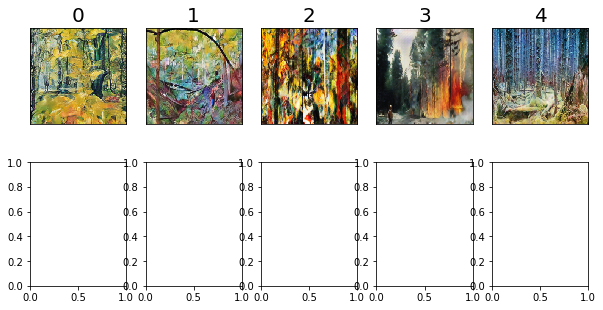

In [112]:
# Visualizing and saving generated forest images. Here are only 10 beacuse printing more made the notebook too lagre.
fig,axes = plt.subplots(2,5,figsize=(10,5))
for i, ax in enumerate(axes.flat): 
    # Uncomment the line below if you would like to visualize all of the images
    #if i == 10: break
    show_img(generated_forest_ims[i][5],ax)
    ax.set_title(i,fontsize=20)
    # Uncomment line below if you would like to save the images
    #plt.imsave((OUT_PATH/f'{i}.png'),generated_forest_ims[i][5])
    
for i in range(len(generated_forest_ims)):
    plt.imsave((OUT_PATH/f'{i}.png'),generated_forest_ims[i][5])
fig.tight_layout()